In [2]:
#import the csv file
import numpy as np
import pandas as pd
import chardet
file = r"C:\Users\93691\Documents\DATA1030-Fall2021\YingSun_DATA1030_project\data\new.csv"
df_origin = pd.read_csv(file,encoding='ISO-8859-1',low_memory=False) #use low_memory=False in case columns have mixed type. 
df = df_origin.drop(columns=['url','id','Lng','Lat','Cid']) # create a new df in case of some origin features will be used later
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df = df.replace("????" and "nan",np.nan)
df.head(5)

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [6]:
out = set(df['floor'])
out

{'µÍ 10',
 'µÍ 11',
 'µÍ 12',
 'µÍ 13',
 'µÍ 14',
 'µÍ 15',
 'µÍ 16',
 'µÍ 17',
 'µÍ 18',
 'µÍ 19',
 'µÍ 2',
 'µÍ 20',
 'µÍ 21',
 'µÍ 22',
 'µÍ 23',
 'µÍ 24',
 'µÍ 25',
 'µÍ 26',
 'µÍ 27',
 'µÍ 28',
 'µÍ 29',
 'µÍ 3',
 'µÍ 30',
 'µÍ 31',
 'µÍ 32',
 'µÍ 33',
 'µÍ 34',
 'µÍ 35',
 'µÍ 36',
 'µÍ 37',
 'µÍ 42',
 'µÍ 5',
 'µÍ 6',
 'µÍ 63',
 'µÍ 7',
 'µÍ 8',
 'µÍ 9',
 'µ× 1',
 'µ× 10',
 'µ× 11',
 'µ× 12',
 'µ× 13',
 'µ× 14',
 'µ× 15',
 'µ× 16',
 'µ× 17',
 'µ× 18',
 'µ× 19',
 'µ× 2',
 'µ× 20',
 'µ× 21',
 'µ× 22',
 'µ× 23',
 'µ× 24',
 'µ× 25',
 'µ× 26',
 'µ× 27',
 'µ× 28',
 'µ× 29',
 'µ× 3',
 'µ× 30',
 'µ× 31',
 'µ× 32',
 'µ× 33',
 'µ× 34',
 'µ× 4',
 'µ× 5',
 'µ× 6',
 'µ× 7',
 'µ× 8',
 'µ× 9',
 '¶¥ 10',
 '¶¥ 11',
 '¶¥ 12',
 '¶¥ 13',
 '¶¥ 14',
 '¶¥ 15',
 '¶¥ 16',
 '¶¥ 17',
 '¶¥ 18',
 '¶¥ 19',
 '¶¥ 2',
 '¶¥ 20',
 '¶¥ 21',
 '¶¥ 22',
 '¶¥ 23',
 '¶¥ 24',
 '¶¥ 25',
 '¶¥ 26',
 '¶¥ 27',
 '¶¥ 28',
 '¶¥ 29',
 '¶¥ 3',
 '¶¥ 30',
 '¶¥ 31',
 '¶¥ 32',
 '¶¥ 33',
 '¶¥ 34',
 '¶¥ 4',
 '¶¥ 5',
 '¶¥ 6',
 '¶¥ 7',
 '

# EDA

In [7]:
print('number of rows:',len(df),'number of columns:',len(df.columns))

number of rows: 318851 number of columns: 21


In [8]:
df.dtypes

tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [9]:
df.describe()

,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [49]:
#unexpected data

#some building type is <1, while it is a categorical feature, it only be 1,2,3,4. 
#I found that all other values except for 1:4 are all <1, so I use <1 here. 
df = df[df['buildingType']>=1]

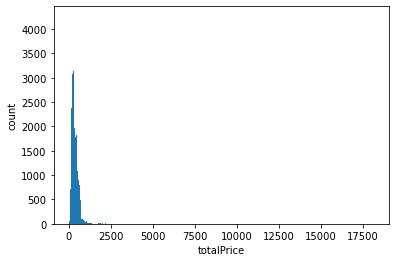

In [20]:
#single column

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#target variable. cts. Histogram.
df['totalPrice'].plot.hist(bins = df['totalPrice'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('totalPrice')
plt.ylabel('count')
plt.show()

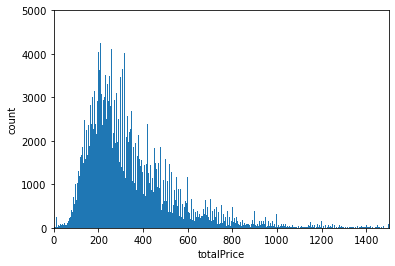

In [23]:
#To make the plot more clear, I graph portion (0,2500). This only shows a trend. Note that some outliers are dropped
df['totalPrice'].plot.hist(bins = df['totalPrice'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('totalPrice')
plt.ylabel('count')
plt.axis([0,1500,0,5000])
plt.show()

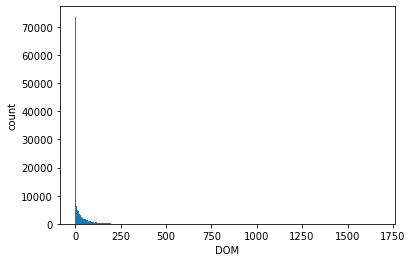

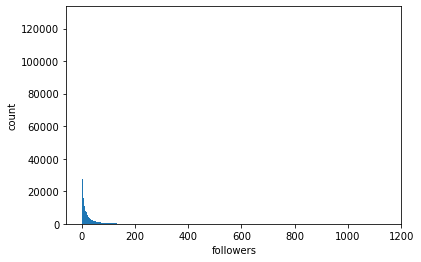

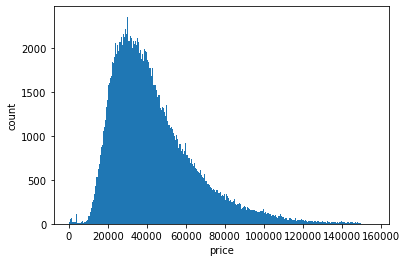

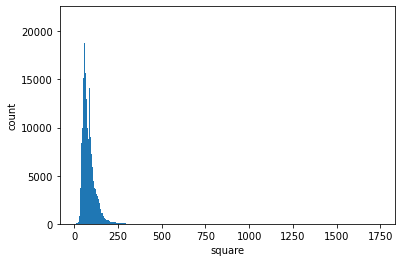

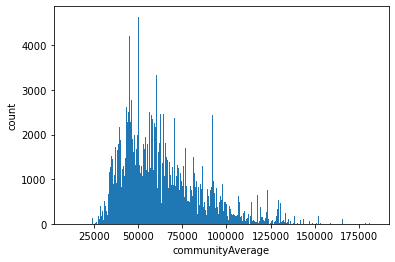

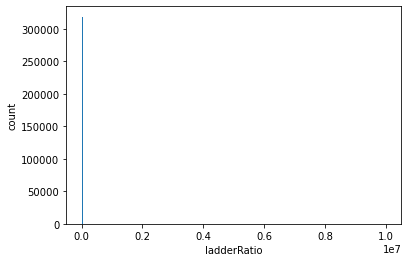

In [44]:
#continuous data. Histogram.
#features: DOM, followers, price, square, ladderRatio,communityAverage

list_cts = ('DOM', 'followers', 'price', 'ladderRatio','square','communityAverage')
list_cts_plot = ('DOM', 'followers', 'price','square','communityAverage')
for i in list_cts_plot:
    df[i].plot.hist(bins = int(np.sqrt(df.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()
    
#the previous argument is not fit for ladderRatio
df['ladderRatio'].plot.hist(bins = df['ladderRatio'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
plt.xlabel('ladderRatio')
plt.ylabel('count')
plt.show()



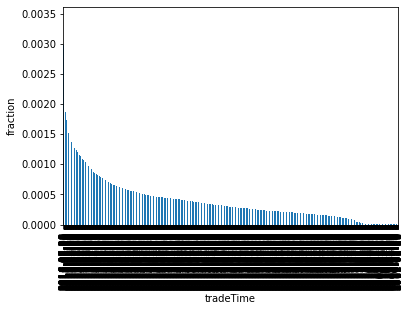

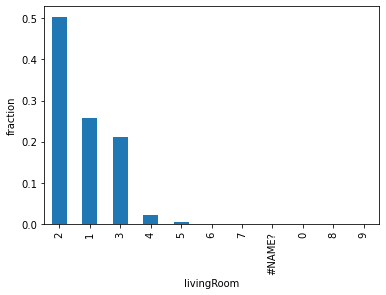

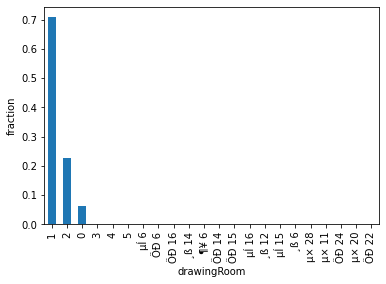

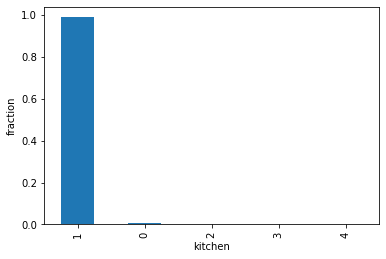

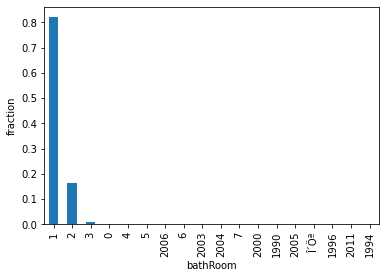

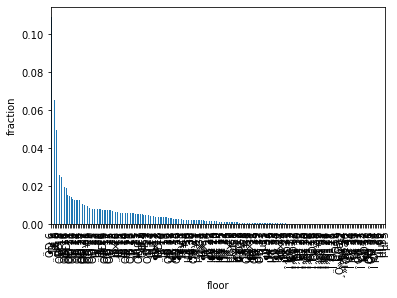

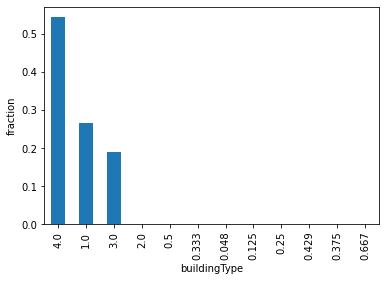

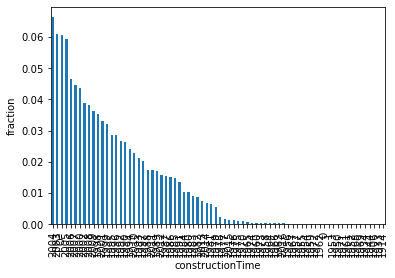

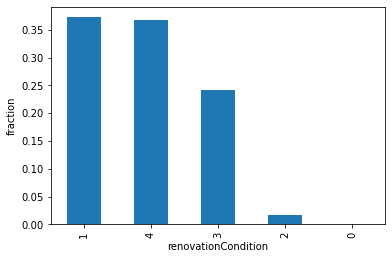

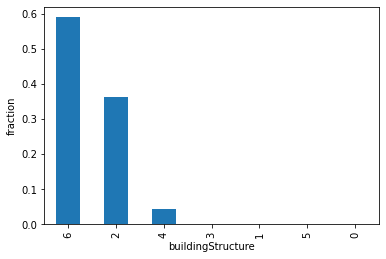

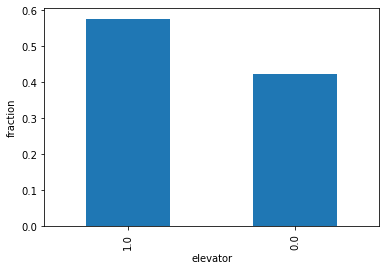

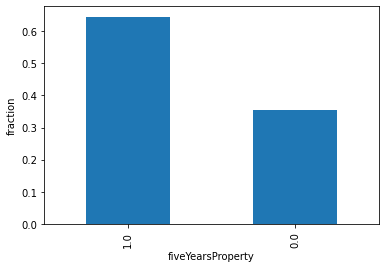

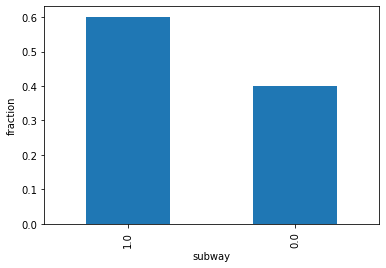

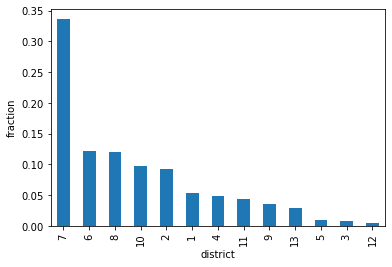

In [45]:
#categorical feature. Bar. ylable = fraction
#features: tradeTime, livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime, 
          #renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
list_cate = ('tradeTime','livingRoom','drawingRoom','kitchen','bathRoom','floor','buildingType','constructionTime','renovationCondition','buildingStructure','elevator','fiveYearsProperty','subway','district')
for i in list_cate:
    pd.value_counts(df[i],normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.xlabel(i)
    plt.show()

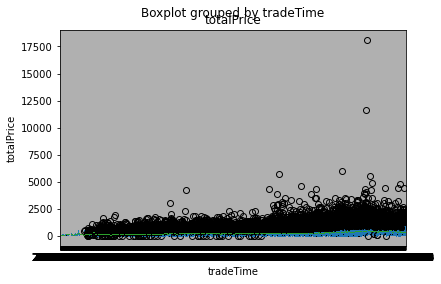

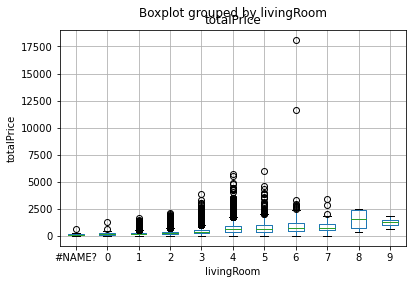

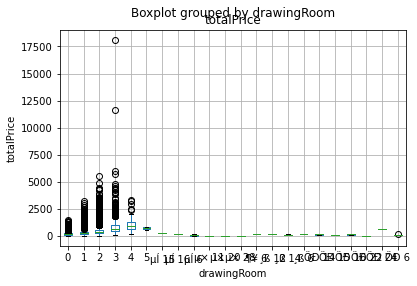

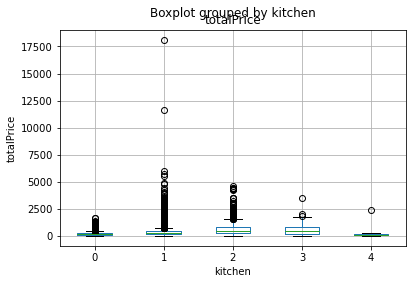

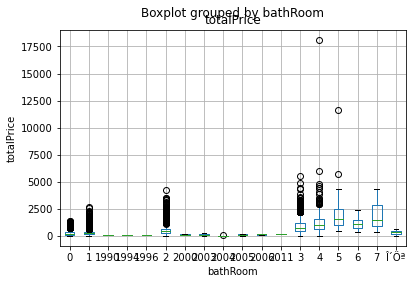

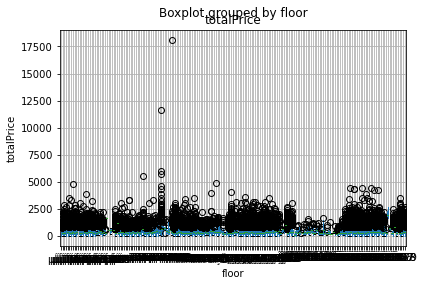

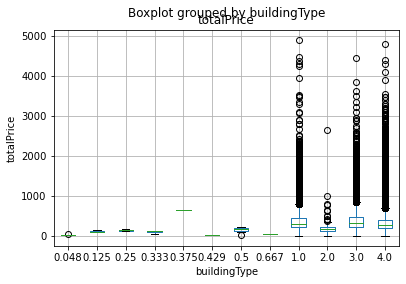

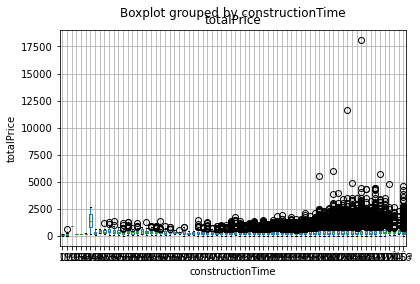

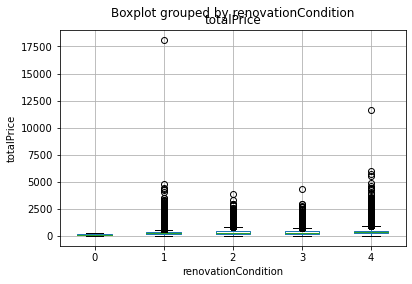

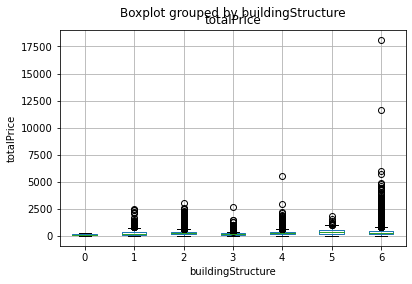

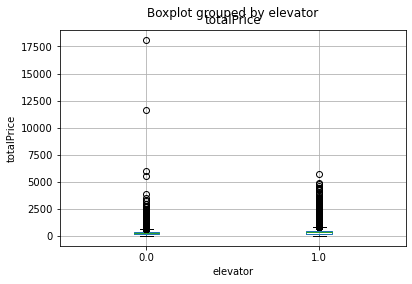

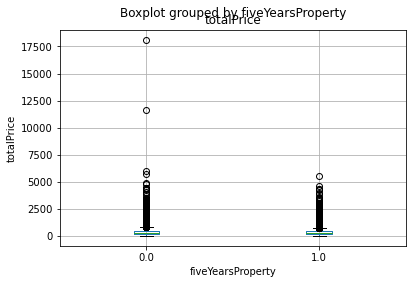

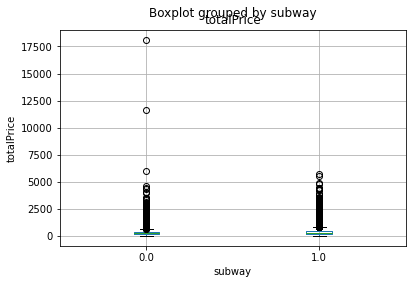

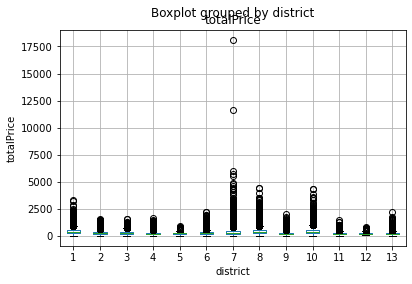

In [47]:
#two columns: feature and target variable

#continuous and categorical columns, can use cviolin plot, box plot and category-specific histograms. 
#Box plot is better here
for i in list_cate:
    df[['totalPrice',i]].boxplot(by=i)
    plt.ylabel('totalPrice')
    plt.xlabel(i)
    plt.show()

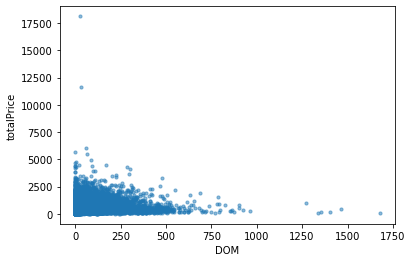

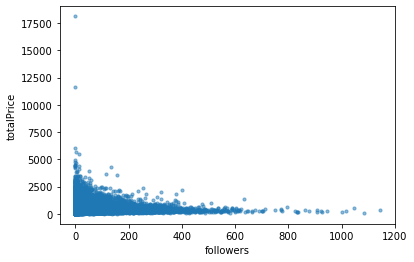

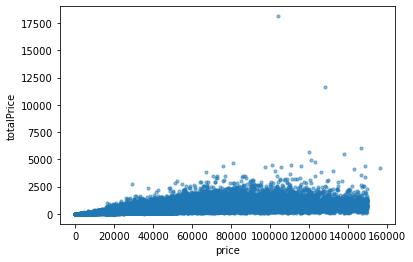

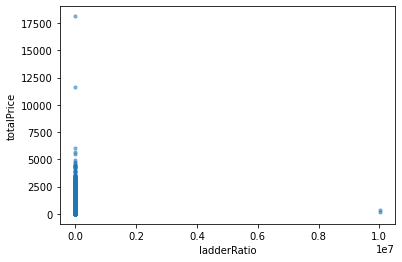

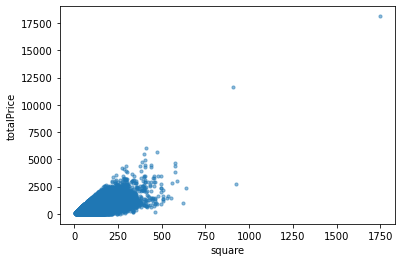

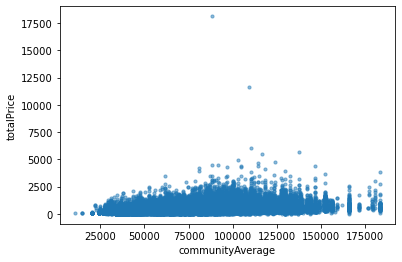

In [48]:
# continuous and continuous columns, can use scatter and heatmap. Scatter is better here

for i in list_cts:
    df.plot.scatter(i,'totalPrice',alpha=0.5,s=10)
    plt.show()

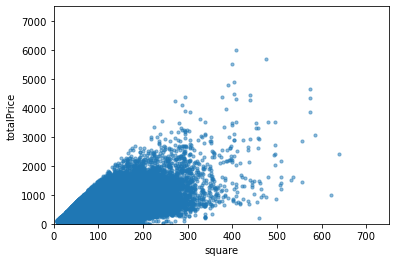

In [24]:
df.plot.scatter('square','totalPrice',alpha=0.5,s=10)
plt.axis([0,750,0,7500])
plt.show()

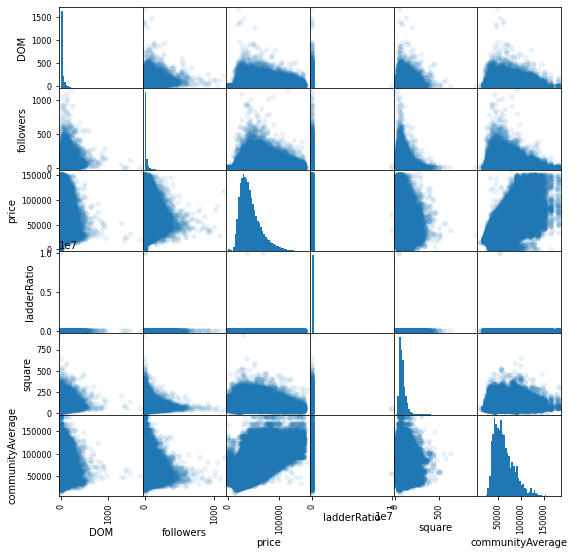

In [55]:
pd.plotting.scatter_matrix(df[['DOM', 'followers', 'price', 'ladderRatio','square','communityAverage']], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

# Data Processing

In [58]:
#split into groups
from sklearn.model_selection import train_test_split
from decimal import *

def basic_split(X,y,train_size,val_size,test_size,random_state):
    if Decimal(str(train_size)) + Decimal(str(val_size)) + Decimal(str(test_size)) == Decimal(str(1)):
        if isinstance(random_state, int)==True:
            # first split to separate out the training set
            X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
            # second split to separate out the validation and test sets
            X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(1-train_size),random_state = random_state)
        else:
            raise ValueError("Error")
    else:
        raise ValueError("Error")

    print(X_train.size, y_train.size, X_val.size, y_val.size, X_test.size, y_test.size)
    return X_train, y_train, X_val, y_val, X_test, y_test
    print(X_train.head(), y_train.head(), X_val.head(), y_val.head(), X_test.head(), y_test.head())

random_state = 42
train_size = 0.6
val_size = 0.2
test_size = 0.2
basic_split(X,y,train_size,val_size,test_size,random_state)

3826200 191310 1275400 63770 1275420 63771


(         tradeTime    DOM  followers  price  square livingRoom drawingRoom  \
 24667   2016-08-09    8.0         28  49914   57.90          2           1   
 203633  2015-08-03    NaN          0  58122  158.29          3           2   
 78355   2017-12-11  183.0         42  53310   66.78          1           1   
 152542  2014-06-25    NaN          2  27862  136.03          3           2   
 43836   2016-12-09   57.0         21  86083   97.00          2           1   
 ...            ...    ...        ...    ...     ...        ...         ...   
 119879  2011-10-07    NaN          0  22718   69.33          1           1   
 259178  2015-09-13    NaN          8  50132   76.20          2           1   
 131932  2012-12-28    NaN          2  37774   50.30          2           1   
 146867  2014-01-22    NaN         14  29561   45.50          1           1   
 121958  2012-06-08    NaN          0  27286   71.10          3           1   
 
         kitchen bathRoom  floor  buildingType con

In [59]:
#transform

#continuous data: tradeTime, DOM, followers, price, square, ladderRatio,communityAverage
#Hard to say there is a scale for these feature, so I choose Standard.
from sklearn.preprocessing import StandardScaler

std_ftrs = ['tradeTime','DOM','followers','price','square','ladderRatio','communityAverage']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-0.41457289  0.33731519  0.29606455 -0.68021026 -0.26634685 -0.14751718]
 [        nan -0.49321866  0.67441018  2.01568018  1.60564763  1.95405469]
 [ 3.11203762  0.75258211  0.45260229 -0.4417452   0.66965039 -0.82885095]
 ...
 [        nan -0.43389482 -0.2635256  -0.88430197 -0.26634685  0.29702798]
 [        nan -0.07795174 -0.64210171 -1.013202   -0.45130439 -0.82759454]
 [        nan -0.49321866 -0.74696724 -0.32573517  0.66965039 -0.31331857]]
[[-0.49518113 -0.34490905 -0.8946087   1.38890378  0.66965039 -1.22094095]
 [        nan -0.16693751 -0.64924639  2.97034604  0.109173    0.2579895 ]
 [-0.05183581  0.24832942  1.47816417 -0.49357375 -0.26634685  0.95848354]
 ...
 [ 1.35880839  8.0494152   0.26472013  1.26671729  6.27442428 -0.26656212]
 [-0.55563731 -0.40423289 -0.70359209  0.47639898  0.66965039 -0.82759454]
 [-0.55563731 -0.49321866 -0.21904418 -0.74466027 -0.26634685  1.03045794]]
[[-0.03168375 -0.01862789  0.0169148   0.13454536  0.66965039 -0.48086996]
 [-0.13244405

In [61]:
#categorical feature: 
#OneHot: buildingType, renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
from sklearn.preprocessing import OneHotEncoder
onehot_ftrs = ['buildingType','renovationCondition','buildingStructure','elevator','fiveYearsProperty','subway','district']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))

feature names: ['livingRoom_#NAME?' 'livingRoom_0' 'livingRoom_1' 'livingRoom_2'
 'livingRoom_3' 'livingRoom_4' 'livingRoom_5' 'livingRoom_6'
 'livingRoom_7' 'livingRoom_8' 'drawingRoom_0' 'drawingRoom_1'
 'drawingRoom_2' 'drawingRoom_3' 'drawingRoom_4' 'drawingRoom_5'
 'drawingRoom_µÍ 15' 'drawingRoom_µÍ 16' 'drawingRoom_µÍ 6'
 'drawingRoom_µ× 11' 'drawingRoom_µ× 20' 'drawingRoom_µ× 28'
 'drawingRoom_¶¥ 6' 'drawingRoom_¸ß 14' 'drawingRoom_¸ß 6'
 'drawingRoom_ÖÐ 15' 'drawingRoom_ÖÐ 16' 'drawingRoom_ÖÐ 24'
 'drawingRoom_ÖÐ 6' 'kitchen_0' 'kitchen_1' 'kitchen_2' 'kitchen_3'
 'kitchen_4' 'bathRoom_0' 'bathRoom_1' 'bathRoom_1990' 'bathRoom_2'
 'bathRoom_2000' 'bathRoom_2003' 'bathRoom_2004' 'bathRoom_2005'
 'bathRoom_2006' 'bathRoom_3' 'bathRoom_4' 'bathRoom_5' 'bathRoom_6'
 'bathRoom_7' 'bathRoom_Î´Öª' 'floor_µÍ 10' 'floor_µÍ 11' 'floor_µÍ 12'
 'floor_µÍ 13' 'floor_µÍ 14' 'floor_µÍ 15' 'floor_µÍ 16' 'floor_µÍ 17'
 'floor_µÍ 18' 'floor_µÍ 19' 'floor_µÍ 20' 'floor_µÍ 21' 'floor_µÍ 22'
 'flo

In [ ]:
#odinal
from sklearn.preprocessing import OrdinalEncoder
ordinal_ftrs = ['education'] # if you have more than one ordinal feature, add the feature names here
ordinal_cats = [[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',\
                ' Some-college',' Assoc-voc',' Assoc-acdm',' Bachelors',' Masters',' Prof-school',' Doctorate']]
# ordinal_cats must contain one list per ordinal feature! each list contains the ordered list of categories 
# of the corresponding feature

enc = OrdinalEncoder(categories = ordinal_cats)   # By default, the categories are alphabetically ordered
                                                    # which is NOT what you want usually.

# fit the training data
enc.fit(X_train[ordinal_ftrs])  # the encoder expects a 2D array, that's why the column name is in a list

# transform X_train. We could use enc.fit_transform(X_train) to combine fit and transform
ordinal_train = enc.transform(X_train[ordinal_ftrs])
print('transformed train features:')
print(ordinal_train)
# transform X_val
ordinal_val = enc.transform(X_val[ordinal_ftrs])
print('transformed validation features:')
print(ordinal_val)
# transform X_test
ordinal_test = enc.transform(X_test[ordinal_ftrs])
print('transformed test features:')
print(ordinal_test)
['constructionTime', 'livingRoom','drawingRoom','kitchen','bathRoom','floor']